In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
plt.rcParams['figure.figsize'] = (14,7)

In [17]:
#%% Parametros Senoidal
a1 = np.sqrt(2) #Amplitud normalizada de la señal
nn = 1000       # Cantidad de muestras que tiene mi señal
rr = 200         # La cantidad de realizaciones que se hacen
fs=nn           # Igualo fs a nn para que deltaf =1 
Zpadding = 10      
df = fs/nn
Ts =  1 / fs    #   Me detengo en la mitad de la frecuencia de trabajo
W0 = fs / 4     #
snr10 = 10
snr3 = 3

###########Parametros de graficas de frecuencia
ff = np.linspace(0, (nn-1)*df, nn)
bfrec = ff <= fs/2
dfz = fs/Zpadding/nn
ffz = np.linspace(0, (Zpadding*nn-1)*dfz, Zpadding*nn)  # eje en frecuencia con zero padding
bfrecz = ffz <= fs/2 
#############

# fr = np.random.uniform(-1/2, 1/2, size = (1,rr))
fr = np.random.uniform(-1/2, 1/2, size = (1,rr))  # Genero la dispersión de frecuencias
W1 = W0 + fr    # cantidad de W1 igual a la cantidad de realizaciónes 
#W1 = W0 + 1/2


tt = np.arange(0, nn*Ts, Ts).reshape(nn,1)  # Defino el eje de tiempo para cada realización
tt2 = np.arange(0, 10*nn*Ts, Ts).reshape(10*nn,1) 

# Genero el ruido uniforme
Pn10 = 10**(-snr10/10)
Vn10 = np.sqrt(Pn10*12) 
Noise10 = np.random.uniform(-Vn10/2, Vn10/2, size = (nn,rr))

Pn3 = 10**(-snr3/10)
Vn3 = np.sqrt(Pn3*12) 
Noise3 = np.random.uniform(-Vn3/2, Vn3/2, size = (nn,rr))


ttr =  tt * np.ones((nn,rr)) 
#Senoidal pura
xx = a1 * np.sin(W1*2*np.pi * ttr)

#Senoidal + Ruido
x10 = xx + Noise10
x3 = xx + Noise3

In [18]:
#%% Boxcar
##### SNR = 10db
## Sin zero padding
sig10_fft_sig_boxcar = np.fft.fft( x10,    axis = 0 )/nn
sig10_dp_sig_boxcar = np.abs(sig10_fft_sig_boxcar[bfrec])**2
sig10_dp_sig_boxcar_db = 10* np.log10(2*sig10_dp_sig_boxcar)

## Con zero padding
sig10_xi_boxcar = np.vstack([x10,np.zeros([(Zpadding-1)*nn,rr])])
sig10_fft_sig_boxcar_zp = np.fft.fft( sig10_xi_boxcar,    axis = 0 )/nn
sig10_dp_sig_boxcar_zp = np.abs(sig10_fft_sig_boxcar_zp[bfrecz])**2
sig10_dp_sig_boxcar_db_zp = 10* np.log10(2*sig10_dp_sig_boxcar_zp)

##### SNR = 3db
## Sin zero padding
sig3_fft_sig_boxcar = np.fft.fft( x3,    axis = 0 )/nn
sig3_dp_sig_boxcar = np.abs(sig3_fft_sig_boxcar[bfrec])**2
sig3_dp_sig_boxcar_db = 10* np.log10(2*sig3_dp_sig_boxcar)

## Con zero padding
sig3_xi_boxcar = np.vstack([x3,np.zeros([(Zpadding-1)*nn,rr])])
sig3_fft_sig_boxcar_zp = np.fft.fft( sig3_xi_boxcar,    axis = 0 )/nn
sig3_dp_sig_boxcar_zp = np.abs(sig3_fft_sig_boxcar_zp[bfrecz])**2
sig3_dp_sig_boxcar_db_zp = 10* np.log10(2*sig3_dp_sig_boxcar_zp)

In [19]:
#%%
##Periodograma de welch


##### SNR = 10dB
#Sin Zero padding
sig10_welch_ff, sig10_welch_Pxx = sig.welch(x = x10, fs = fs, window = 'hann', scaling='spectrum', axis=0, nfft = nn)
sig10_welch_Pxx_db = 10* np.log10(sig10_welch_Pxx)
#Con Zero Padding
sig10_welch_ff_zp, sig10_welch_Pxx_zp = sig.welch(x = x10, fs = fs, window = 'hann', scaling='spectrum', axis=0, nfft = 10*nn)
sig10_welch_Pxx_zp_db = 10* np.log10(sig10_welch_Pxx_zp)

##### SNR = 3dB
#Sin Zero padding
sig3_welch_ff, sig3_welch_Pxx = sig.welch(x = x3, fs = fs, window = 'hann', scaling='spectrum', axis=0, nfft = nn)
sig3_welch_Pxx_db = 10* np.log10(sig3_welch_Pxx)
#Con Zero Padding
sig3_welch_ff_zp, sig3_welch_Pxx_zp = sig.welch(x = x10, fs = fs, window = 'hann', scaling='spectrum', axis=0, nfft = 10*nn)
sig3_welch_Pxx_zp_db = 10* np.log10(sig3_welch_Pxx_zp)


(0.0, 500.0)

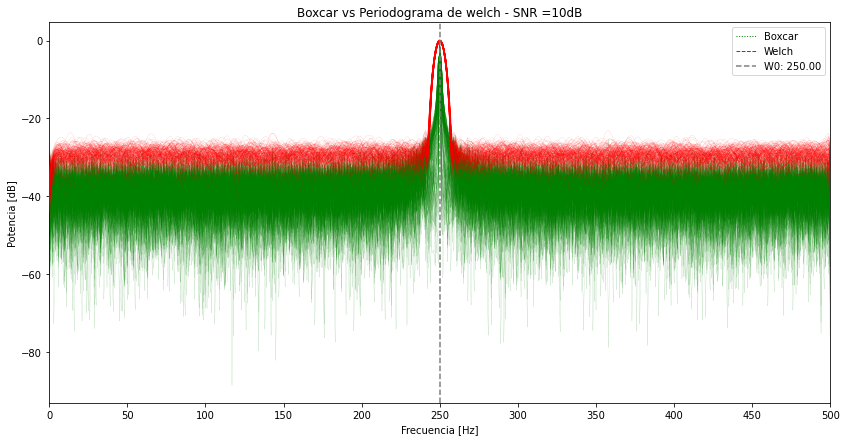

In [20]:
#%% Ploteo boxcar
plt.figure(1)
plt.title("Boxcar vs Periodograma de welch - SNR =10dB")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.plot( [], [], label="Boxcar",            color='green',    linestyle=':',  linewidth=1)
plt.plot( ff[bfrec], sig10_dp_sig_boxcar_db,    color='green',    linestyle=':',  linewidth=.2, zorder=1)
plt.plot( [], [], label="Welch",          color='red',   linestyle='--', linewidth=1)
plt.plot( sig10_welch_ff,  sig10_welch_Pxx_db,        color='red',   linestyle='--', linewidth=.1, zorder=5)
plt.axvline(W0, color='grey', linestyle='--', label=f'W0: {W0:.2f}', zorder=10)
plt.legend(loc='upper right')
plt.xticks(np.arange(0, nn/2+1, nn/20))

plt.xlim([0, nn/2])

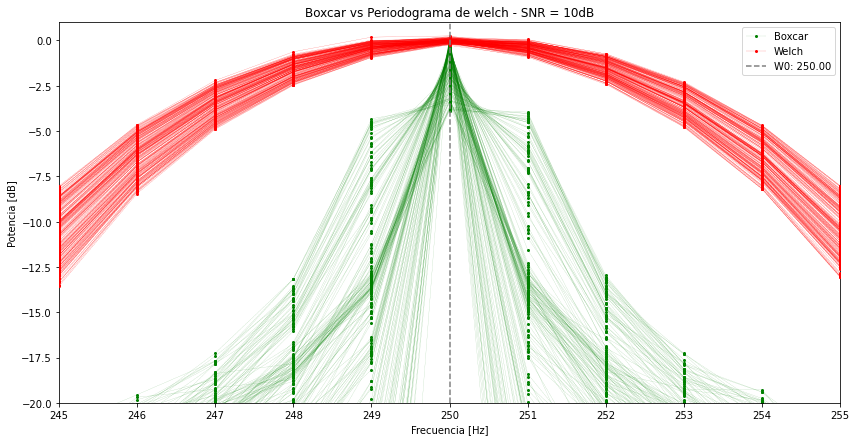

In [21]:


plt.figure(2)
plt.title("Boxcar vs Periodograma de welch - SNR = 10dB")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.xlim([0, nn/2])
plt.plot( [], [], label="Boxcar",            color='green',    linestyle=':',  linewidth=.2, marker='o', markersize=2)
plt.plot( ff[bfrec], sig10_dp_sig_boxcar_db,    color='green',    linestyle=':',  linewidth=.2, marker='o', markersize=2, zorder=1)
plt.plot( [], [], label="Welch",          color='red', linestyle='--', linewidth=.2, marker='o', markersize=2)
plt.plot( sig10_welch_ff,  sig10_welch_Pxx_db,        color='red', linestyle='--', linewidth=.2, marker='o', markersize=2, zorder=5)
plt.axvline(W0, color='grey', linestyle='--', label=f'W0: {W0:.2f}', zorder=10)
plt.legend(loc='upper right')
plt.xticks(np.arange(W0-5*df, W0+5*df+1, df))

plt.xlim(W0-5*df, W0+5*df)
plt.ylim(-20, 1)
plt.show()

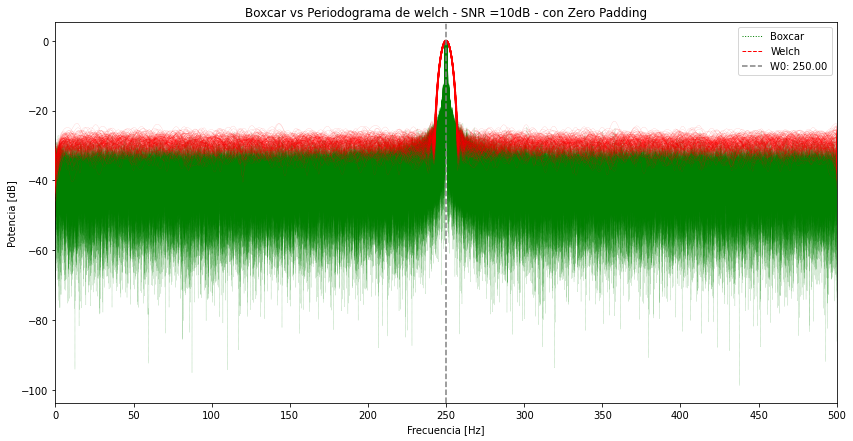

In [22]:
plt.figure(3)
plt.title("Boxcar vs Periodograma de welch - SNR =10dB - con Zero Padding")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.plot( [], [], label="Boxcar",            color='green',    linestyle=':',  linewidth=1)
plt.plot( ffz[bfrecz], sig10_dp_sig_boxcar_db_zp,    color='green',    linestyle=':',  linewidth=.2, zorder=1)
plt.plot( [], [], label="Welch",          color='red',   linestyle='--', linewidth=1)
plt.plot( sig10_welch_ff_zp,  sig10_welch_Pxx_zp_db,        color='red',   linestyle='--', linewidth=.1, zorder=5)
plt.axvline(W0, color='grey', linestyle='--', label=f'W0: {W0:.2f}', zorder=10)
plt.legend(loc='upper right')
plt.xticks(np.arange(0, nn/2+1, nn/20))

plt.xlim([0, nn/2])
plt.show()

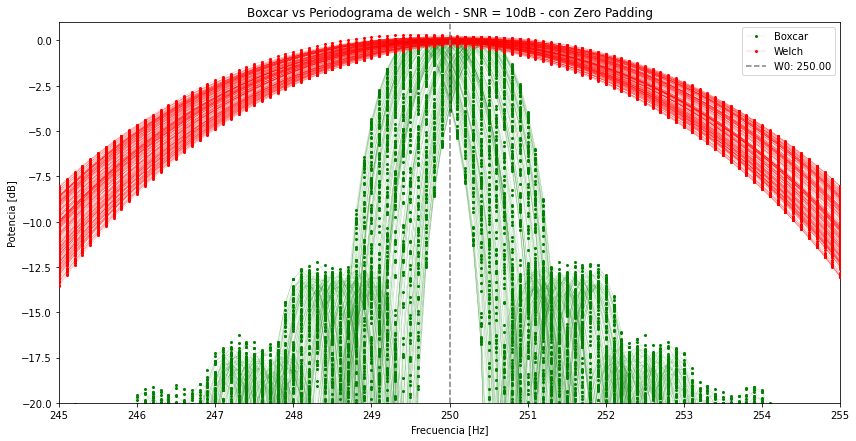

In [23]:
plt.figure(4)
plt.title("Boxcar vs Periodograma de welch - SNR = 10dB - con Zero Padding")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.xlim([0, nn/2])
plt.plot( [], [], label="Boxcar",            color='green',    linestyle=':',  linewidth=.2, marker='o', markersize=2)
plt.plot( ffz[bfrecz], sig10_dp_sig_boxcar_db_zp,    color='green',    linestyle=':',  linewidth=.2, marker='o', markersize=2, zorder=1)
plt.plot( [], [], label="Welch",          color='red', linestyle='--', linewidth=.2, marker='o', markersize=2)
plt.plot( sig10_welch_ff_zp,  sig10_welch_Pxx_zp_db,        color='red', linestyle='--', linewidth=.2, marker='o', markersize=2, zorder=5)
plt.axvline(W0, color='grey', linestyle='--', label=f'W0: {W0:.2f}', zorder=10)
plt.legend(loc='upper right')
plt.xticks(np.arange(W0-5*df, W0+5*df+1, df))

plt.xlim(W0-5*df, W0+5*df)
plt.ylim(-20, 1)
plt.show()

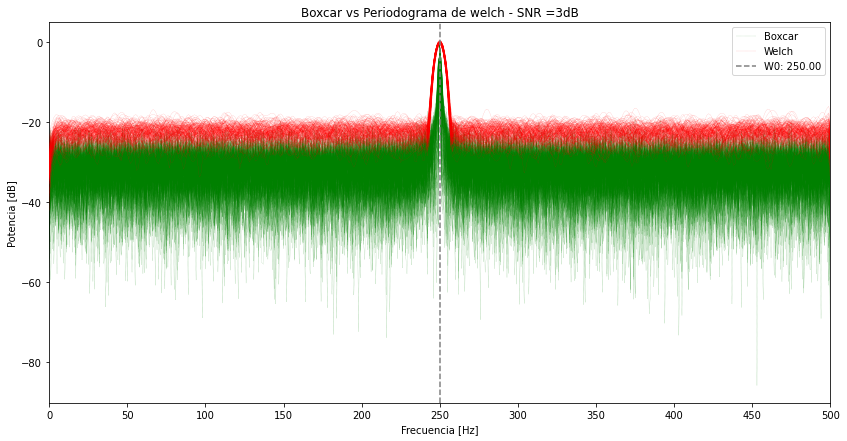

In [24]:
#%% Repito para 3db

plt.figure(5)
plt.title("Boxcar vs Periodograma de welch - SNR =3dB")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.plot( [], [], label="Boxcar",            color='green',    linestyle=':',  linewidth=.2)
plt.plot( ff[bfrec], sig3_dp_sig_boxcar_db,    color='green',    linestyle=':',  linewidth=.2, zorder=1)
plt.plot( [], [], label="Welch",          color='red',   linestyle='--', linewidth=.1)
plt.plot( sig3_welch_ff,  sig3_welch_Pxx_db,        color='red',   linestyle='--', linewidth=.1, zorder=5)
plt.axvline(W0, color='grey', linestyle='--', label=f'W0: {W0:.2f}', zorder=10)
plt.legend(loc='upper right')
plt.xticks(np.arange(0, nn/2+1, nn/20))

plt.xlim([0, nn/2])
plt.show()



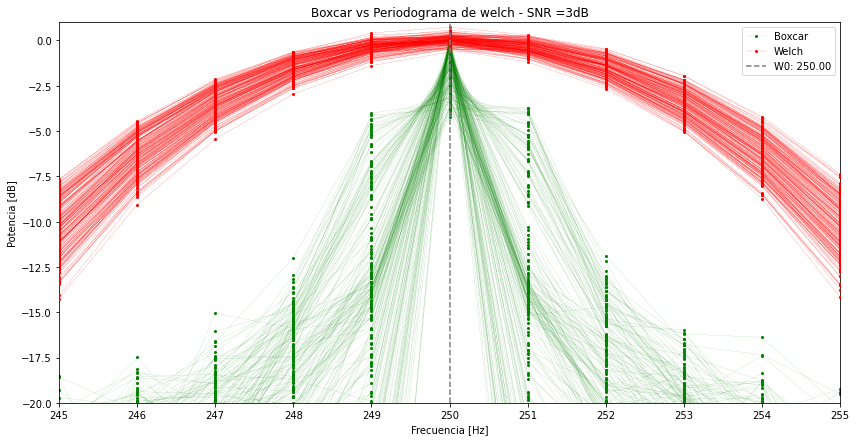

In [25]:

plt.figure(6)
plt.title("Boxcar vs Periodograma de welch - SNR =3dB")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.xlim([0, nn/2])
plt.plot( [], [], label="Boxcar",            color='green',    linestyle=':',  linewidth=.2, marker='o', markersize=2)
plt.plot( ff[bfrec], sig3_dp_sig_boxcar_db,    color='green',    linestyle=':',  linewidth=.2, marker='o', markersize=2, zorder=1)
plt.plot( [], [], label="Welch",          color='red', linestyle='--', linewidth=.2, marker='o', markersize=2)
plt.plot( sig3_welch_ff,  sig3_welch_Pxx_db,        color='red', linestyle='--', linewidth=.2, marker='o', markersize=2, zorder=5)
plt.axvline(W0, color='grey', linestyle='--', label=f'W0: {W0:.2f}', zorder=10)
plt.legend(loc='upper right')
plt.xticks(np.arange(W0-5*df, W0+5*df+1, df))

plt.xlim(W0-5*df, W0+5*df)
plt.ylim(-20, 1)
plt.show()


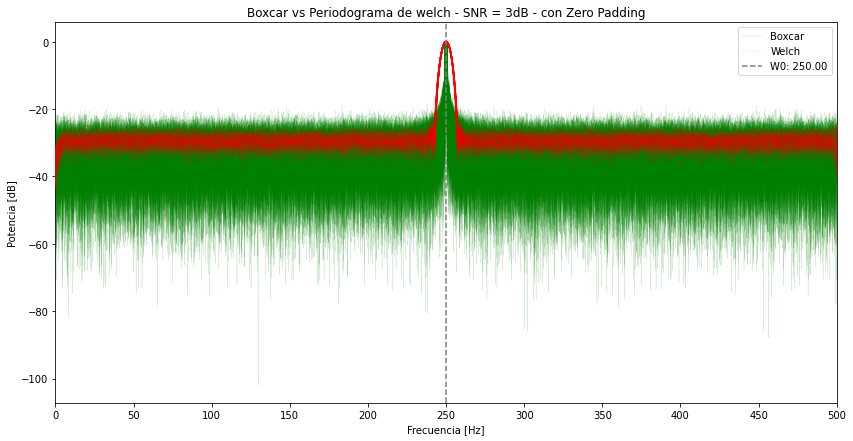

In [26]:

plt.figure(7)
plt.title("Boxcar vs Periodograma de welch - SNR = 3dB - con Zero Padding")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.plot( [], [], label="Boxcar",            color='green',    linestyle=':',  linewidth=.2)
plt.plot( ffz[bfrecz], sig3_dp_sig_boxcar_db_zp,    color='green',    linestyle=':',  linewidth=.2, zorder=1)
plt.plot( [], [], label="Welch",          color='red',   linestyle='--', linewidth=.1)
plt.plot( sig3_welch_ff_zp,  sig3_welch_Pxx_zp_db,        color='red',   linestyle='--', linewidth=.1, zorder=5)
plt.axvline(W0, color='grey', linestyle='--', label=f'W0: {W0:.2f}', zorder=10)
plt.legend(loc='upper right')
plt.xticks(np.arange(0, nn/2+1, nn/20))

plt.xlim([0, nn/2])
plt.show()



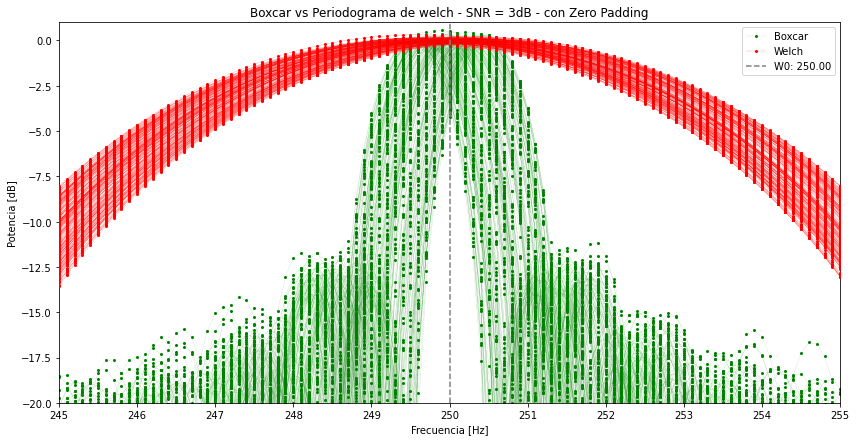

In [27]:
plt.figure(8)
plt.title("Boxcar vs Periodograma de welch - SNR = 3dB - con Zero Padding")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Potencia [dB]")
plt.xlim([0, nn/2])
plt.plot( [], [], label="Boxcar",            color='green',    linestyle=':',  linewidth=.2, marker='o', markersize=2)
plt.plot( ffz[bfrecz], sig3_dp_sig_boxcar_db_zp,    color='green',    linestyle=':',  linewidth=.2, marker='o', markersize=2, zorder=1)
plt.plot( [], [], label="Welch",          color='red', linestyle='--', linewidth=.2, marker='o', markersize=2)
plt.plot( sig3_welch_ff_zp,  sig3_welch_Pxx_zp_db,        color='red', linestyle='--', linewidth=.2, marker='o', markersize=2, zorder=5)
plt.axvline(W0, color='grey', linestyle='--', label=f'W0: {W0:.2f}', zorder=10)
plt.legend(loc='upper right')
plt.xticks(np.arange(W0-5*df, W0+5*df+1, df))

plt.xlim(W0-5*df, W0+5*df)
plt.ylim(-20, 1)
plt.show()

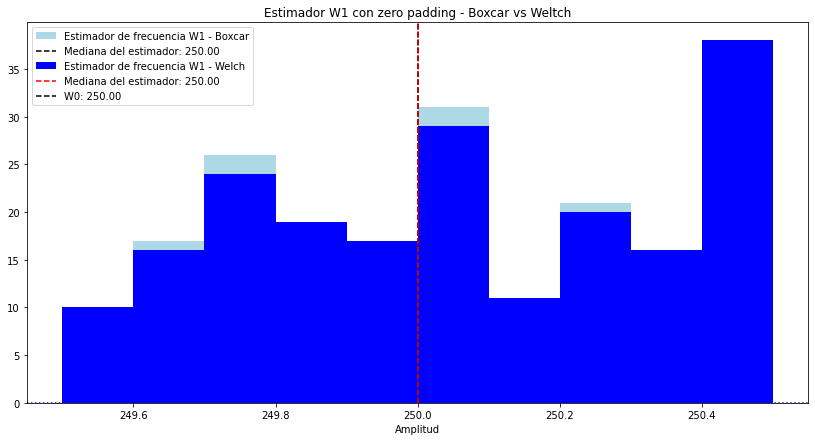

In [28]:
#Estimador de W1
#Para Boxcar con SNR = 10 dB
#Con Zero Padding
est_BC_W_10_zp = ffz[np.argmax(sig10_dp_sig_boxcar_db_zp,axis=0)]
max_BC_val10_zp = np.max(sig10_dp_sig_boxcar_db_zp,axis=0)
med_W_BC_10_zp = np.median(est_BC_W_10_zp)
sesgo_BC_W_10_zp = med_W_BC_10_zp - W0
var_W_BC_10_zp = np.var(est_BC_W_10_zp)

#Para Boxcar con SNR = 3 dB
#Con Zero Padding
est_BC_W_3_zp = ffz[np.argmax(sig3_dp_sig_boxcar_db_zp,axis=0)]
max_BC_val3_zp = np.max(sig3_dp_sig_boxcar_db_zp,axis=0)
med_W_BC_3_zp = np.median(est_BC_W_3_zp)
sesgo_BC_W_3_zp = med_W_BC_3_zp - W0
var_W_BC_3_zp = np.var(est_BC_W_3_zp)

#est_W_bc_zp = ffz[np.argmax(dp_sig_bc_zp,axis=0)]
#max_val_bc_zp = np.max(dp_sig_bc_zp,axis=0)
#med_W_bc_zp = np.median(est_W_bc_zp)
#sesgo_W_bc_zp = med_W_bc_zp - W0
#var_W_bc_zp = np.var(est_W_bc_zp)

#Para Welch con SNR = 10 dB
est_W_10_zp = ffz[np.argmax(sig10_welch_Pxx_zp_db,axis=0)]
max_val10_zp = np.max(sig10_welch_Pxx_zp_db,axis=0)
med_W_10_zp = np.median(est_W_10_zp)
sesgo_W_10_zp = med_W_10_zp - W0
var_W_10_zp = np.var(est_W_10_zp)

#Para Welch con SNR = 3 dB
est_W_3_zp = ffz[np.argmax(sig10_welch_Pxx_zp_db,axis=0)]
max_val3_zp = np.max(sig3_welch_Pxx_zp_db,axis=0)
med_W_3_zp = np.median(est_W_3_zp)
sesgo_W_3_zp = med_W_3_zp - W0
var_W_3_zp = np.var(est_W_3_zp)

plt.figure(6)
plt.title("Estimador W1 con zero padding - Boxcar vs Weltch")
plt.xlabel("Amplitud")
plt.hist( est_BC_W_10_zp,  color='lightblue', label = 'Estimador de frecuencia W1 - Boxcar')
plt.axvline(med_W_BC_10_zp, color='black', linestyle='--', label=f'Mediana del estimador: {med_W_BC_10_zp:.2f}',zorder = 10)
plt.hist( est_W_10_zp,  color='blue', label = 'Estimador de frecuencia W1 - Welch')
plt.axvline(med_W_10_zp, color='red', linestyle='--', label=f'Mediana del estimador: {med_W_10_zp:.2f}',zorder = 10)
plt.axvline(W0, color='black', linestyle='--', label=f'W0: {W0:.2f}')
plt.legend(loc='upper left')
plt.axhline(0,  color='blue', linestyle=':', label='0dB')

In [29]:
#######################################
# Tu simulación que genere resultados #
#######################################
import pandas as pd
from IPython.display import HTML
# Una vez definido tu indicador de performance, calculalo y comparalo para las situaciones pedidas.
tus_resultados = [ 
                   [W0, med_W_BC_10_zp, var_W_BC_10_zp, sesgo_BC_W_10_zp,
                    med_W_10_zp, sesgo_W_10_zp, var_W_10_zp], # <-- acá debería haber numeritos :)
                   [W0,med_W_BC_3_zp ,var_W_BC_3_zp,sesgo_BC_W_3_zp,med_W_3_zp, sesgo_W_3_zp, var_W_3_zp] # <-- acá debería haber numeritos :)
                 ]
df = pd.DataFrame(tus_resultados, columns=['Wo', 'Media Boxcar','Varianza Boxcar', 'Sesgo Boxcar', 'Media Welch','Varianza Welch', 'Sesgo Welch', ],
               index=[  
                        '10 dB',
                        '3 dB'
                     ])
HTML(df.to_html())


,Wo,Media Boxcar,Varianza Boxcar,Sesgo Boxcar,Media Welch,Varianza Welch,Sesgo Welch
10 dB,250.0,250.0,0.089194,0.0,250.0,0.0,0.089494
3 dB,250.0,250.0,0.085560,0.0,250.0,0.0,0.089494


Vemos que el sesgo en el método de Welch es mayor al que se consige usando un ventaneo con Boxcar, pero aún asi el método resulta preferible, ya que la varianza es menor